In [77]:
import pandas as pd

previsores = pd.read_csv('entradas_breast.csv')
previsores.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902


In [78]:
classe = pd.read_csv('saidas_breast.csv')
classe.head(2)

,0
0,0
1,0


In [79]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classificador = Sequential()
#Hidden Layer and initial layer
classificador.add(Dense(units = 16, # initial values ( (N de entradas + N de saidas)/2 -----> (30(colunas)+1(saida binaria))/2 = 15.5 )
                        activation = 'relu', 
                        kernel_initializer = 'random_uniform', # Pesos Iniciais 
                        input_dim = 30))

classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))


# Output Layer
classificador.add(Dense(units = 1, # Saida binaria, 1 saida 
                        activation = 'sigmoid'))

# Adam, otimizador gradiente escotastico, recomendado
otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
otimizador = keras.optimizers.Adam(lr = 0.0001, decay = 0.0001)

classificador.compile(optimizer = otimizador,
                      loss = 'binary_crossentropy', #categorical_crossentropy se nao for binaria
                      metrics = ['binary_accuracy']) #categorical_accuracy

#classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                      metrics = ['binary_accuracy'])

#Model summary
classificador.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [81]:
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 10, epochs = 100)

Epoch 1/100
43/43 [==============================] - 0s 1ms/step - loss: 1.6046 - binary_accuracy: 0.5376
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 0.9644 - binary_accuracy: 0.5892
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 0.7402 - binary_accuracy: 0.6127
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 0.6213 - binary_accuracy: 0.6432
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 0.5561 - binary_accuracy: 0.6761
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 0.5113 - binary_accuracy: 0.6854
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 0.4779 - binary_accuracy: 0.7676
Epoch 8/100
43/43 [==============================] - 0s 1ms/step - loss: 0.4667 - binary_accuracy: 0.7559
Epoch 9/100
43/43 [==============================] - 0s 1ms/step - loss: 0.4539 - binary_accuracy: 0.7629
Epoch 10/100
43/43 [==========================

In [82]:
pesos0 = classificador.layers[0].get_weights()
#print(pesos0)
#print(len(pesos0))
pesos1 = classificador.layers[1].get_weights()
pesos2 = classificador.layers[2].get_weights()

previsoes = classificador.predict(previsores_teste)
previsoes[0:5]

array([[8.9280063e-01],
       [1.0092823e-05],
       [5.0956190e-02],
       [7.1003389e-01],
       [2.0780444e-02]], dtype=float32)

In [83]:
previsoes = (previsoes > 0.5)
previsoes[0:5]

array([[ True],
       [False],
       [False],
       [ True],
       [False]])

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
precisao

0.9090909090909091

In [85]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[47,  8],
       [ 5, 83]], dtype=int64)

<AxesSubplot:>

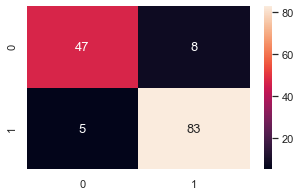

In [86]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

df_cm = pd.DataFrame(matriz, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 13})

In [87]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

5/5 [==============================] - 0s 1ms/step - loss: 0.2199 - binary_accuracy: 0.9091


[0.21986128389835358, 0.9090909361839294]